In [2]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_kalshi_price(data, date, contract_type, strike_price):
    """
    Plot current_kalshi_price over the course of a specific day filtered by contract_type and strike_price.

    Parameters:
        data (pd.DataFrame): The input data containing the relevant columns.
        date (str): The date to filter in 'YYYY-MM-DD' format.
        contract_type (str): The contract type to filter (e.g., 'Yes' or 'No').
        strike_price (int): The strike price to filter.
    """
    # Convert the 'time' column to datetime if it's not already
    data['time'] = pd.to_datetime(data['time'])

    # Filter the data by date, contract_type, and strike_price
    filtered_data = data[(data['time'].dt.date == pd.to_datetime(date).date()) &
                         (data['contract_type'] == contract_type) &
                         (data['strike_price'] == strike_price)]

    if filtered_data.empty:
        print("No data available for the given filters.")
        return

    # Plot current_kalshi_price over time
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['time'], filtered_data['current_kalshi_price'], marker='o', label='Kalshi Price')
    plt.title(f"Kalshi Price on {date} (Contract: {contract_type}, Strike: {strike_price})", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Current Kalshi Price", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


In [3]:
def plot_kalshi_price(data, date, contract_type, strike_price):
    """
    Plot current_kalshi_price over the course of a specific day filtered by contract_type and strike_price.
    Label the first point where pdf_estimate > current_kalshi_price + 10 in green.

    Parameters:
        data (pd.DataFrame): The input data containing the relevant columns.
        date (str): The date to filter in 'YYYY-MM-DD' format.
        contract_type (str): The contract type to filter (e.g., 'Yes' or 'No').
        strike_price (int): The strike price to filter.
    """
    # Convert the 'time' column to datetime if it's not already
    data['time'] = pd.to_datetime(data['time'])

    # Filter the data by date, contract_type, and strike_price
    filtered_data = data[(data['time'].dt.date == pd.to_datetime(date).date()) &
                         (data['contract_type'] == contract_type) &
                         (data['strike_price'] == strike_price)]

    if filtered_data.empty:
        print("No data available for the given filters.")
        return

    # Find the first point where pdf_estimate > current_kalshi_price + 10
    condition = (filtered_data['pdf_estimate'] > (filtered_data['current_kalshi_price'] + 10)) & (filtered_data['current_kalshi_price'] > 50)
    first_condition_index = filtered_data[condition].index.min()

    # Plot current_kalshi_price over time
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['time'], filtered_data['current_kalshi_price'], marker='o', label='Kalshi Price')

    # Highlight the first point meeting the condition
    if pd.notna(first_condition_index):
        first_point = filtered_data.loc[first_condition_index]
        plt.scatter(first_point['time'], first_point['current_kalshi_price'], color='red', label='Condition Met', zorder=5)

    plt.title(f"Kalshi Price on {date} (Contract: {contract_type}, Strike: {strike_price})", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Current Kalshi Price", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


In [4]:
df = pd.read_csv("kalshi-historical-3-16-25-with-y.csv")
df['time'] = pd.to_datetime(df['time'])

In [1]:
plot_kalshi_price(df, '2025-02-3','No', 99000)

NameError: name 'plot_kalshi_price' is not defined

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_kalshi_price_with_model_pred(data, date, contract_type, strike_price):
    """
    Plot current_kalshi_price and pdf_estimate over the course of a specific day 
    filtered by contract_type and strike_price.
    Label the first point where pdf_estimate > current_kalshi_price + 10 in red.

    Parameters:
        data (pd.DataFrame): The input data containing the relevant columns.
        date (str): The date to filter in 'YYYY-MM-DD' format.
        contract_type (str): The contract type to filter (e.g., 'Yes' or 'No').
        strike_price (int): The strike price to filter.
    """
    # Convert the 'time' column to datetime if it's not already
    data['time'] = pd.to_datetime(data['time'])

    # Filter the data by date, contract_type, and strike_price
    filtered_data = data[(data['time'].dt.date == pd.to_datetime(date).date()) &
                         (data['contract_type'] == contract_type) &
                         (data['strike_price'] == strike_price)]

    if filtered_data.empty:
        print("No data available for the given filters.")
        return

    # Find the first point where pdf_estimate > current_kalshi_price + 10
    condition = (filtered_data['pdf_estimate'] > (filtered_data['current_kalshi_price'] + 10)) & (filtered_data['current_kalshi_price'] > 50)
    first_condition_index = filtered_data[condition].index.min()

    # Plot current_kalshi_price over time
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['time'], filtered_data['current_kalshi_price'], marker='o', label='Kalshi Price', color='blue')
    
    # Plot pdf_estimate over time
    plt.plot(filtered_data['time'], filtered_data['pdf_estimate'], marker='s', linestyle='dashed', label='Model Prediction', color='green')

    # Highlight the first point meeting the condition
    if pd.notna(first_condition_index):
        first_point = filtered_data.loc[first_condition_index]
        plt.scatter(first_point['time'], first_point['current_kalshi_price'], color='red', label='Condition Met', zorder=5)

    plt.title(f"Kalshi Price & Model Prediction on {date} (Contract: {contract_type}, Strike: {strike_price})", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Price", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


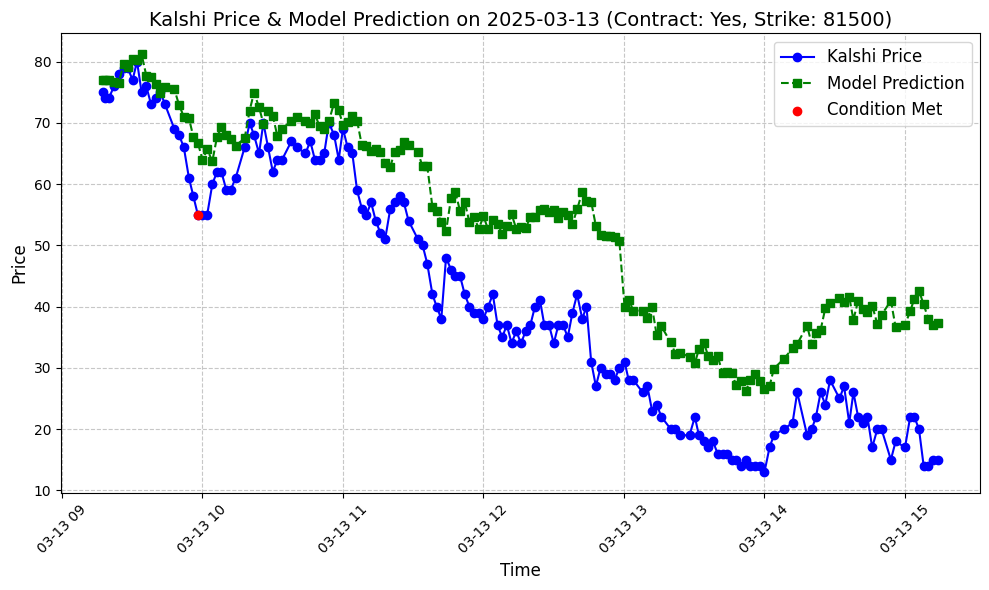

In [ ]:
plot_kalshi_price_with_model_pred(df, '2025-03-04','Yes', 81500)